In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess data
print("Loading data...")
train_data = pd.read_csv("sign_mnist_train.csv")
test_data = pd.read_csv("sign_mnist_test.csv")  # Added test data loading

# Separate features and labels
y_train = train_data['label'].values
X_train = train_data.drop('label', axis=1).values

y_test = test_data['label'].values
X_test = test_data.drop('label', axis=1).values

# Normalize pixel values to [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

m = X_train.shape[0]  # Number of training examples
n = X_train.shape[1]  # Number of features
print("m =", m, "n =", n)

Loading data...
m = 27455 n = 784


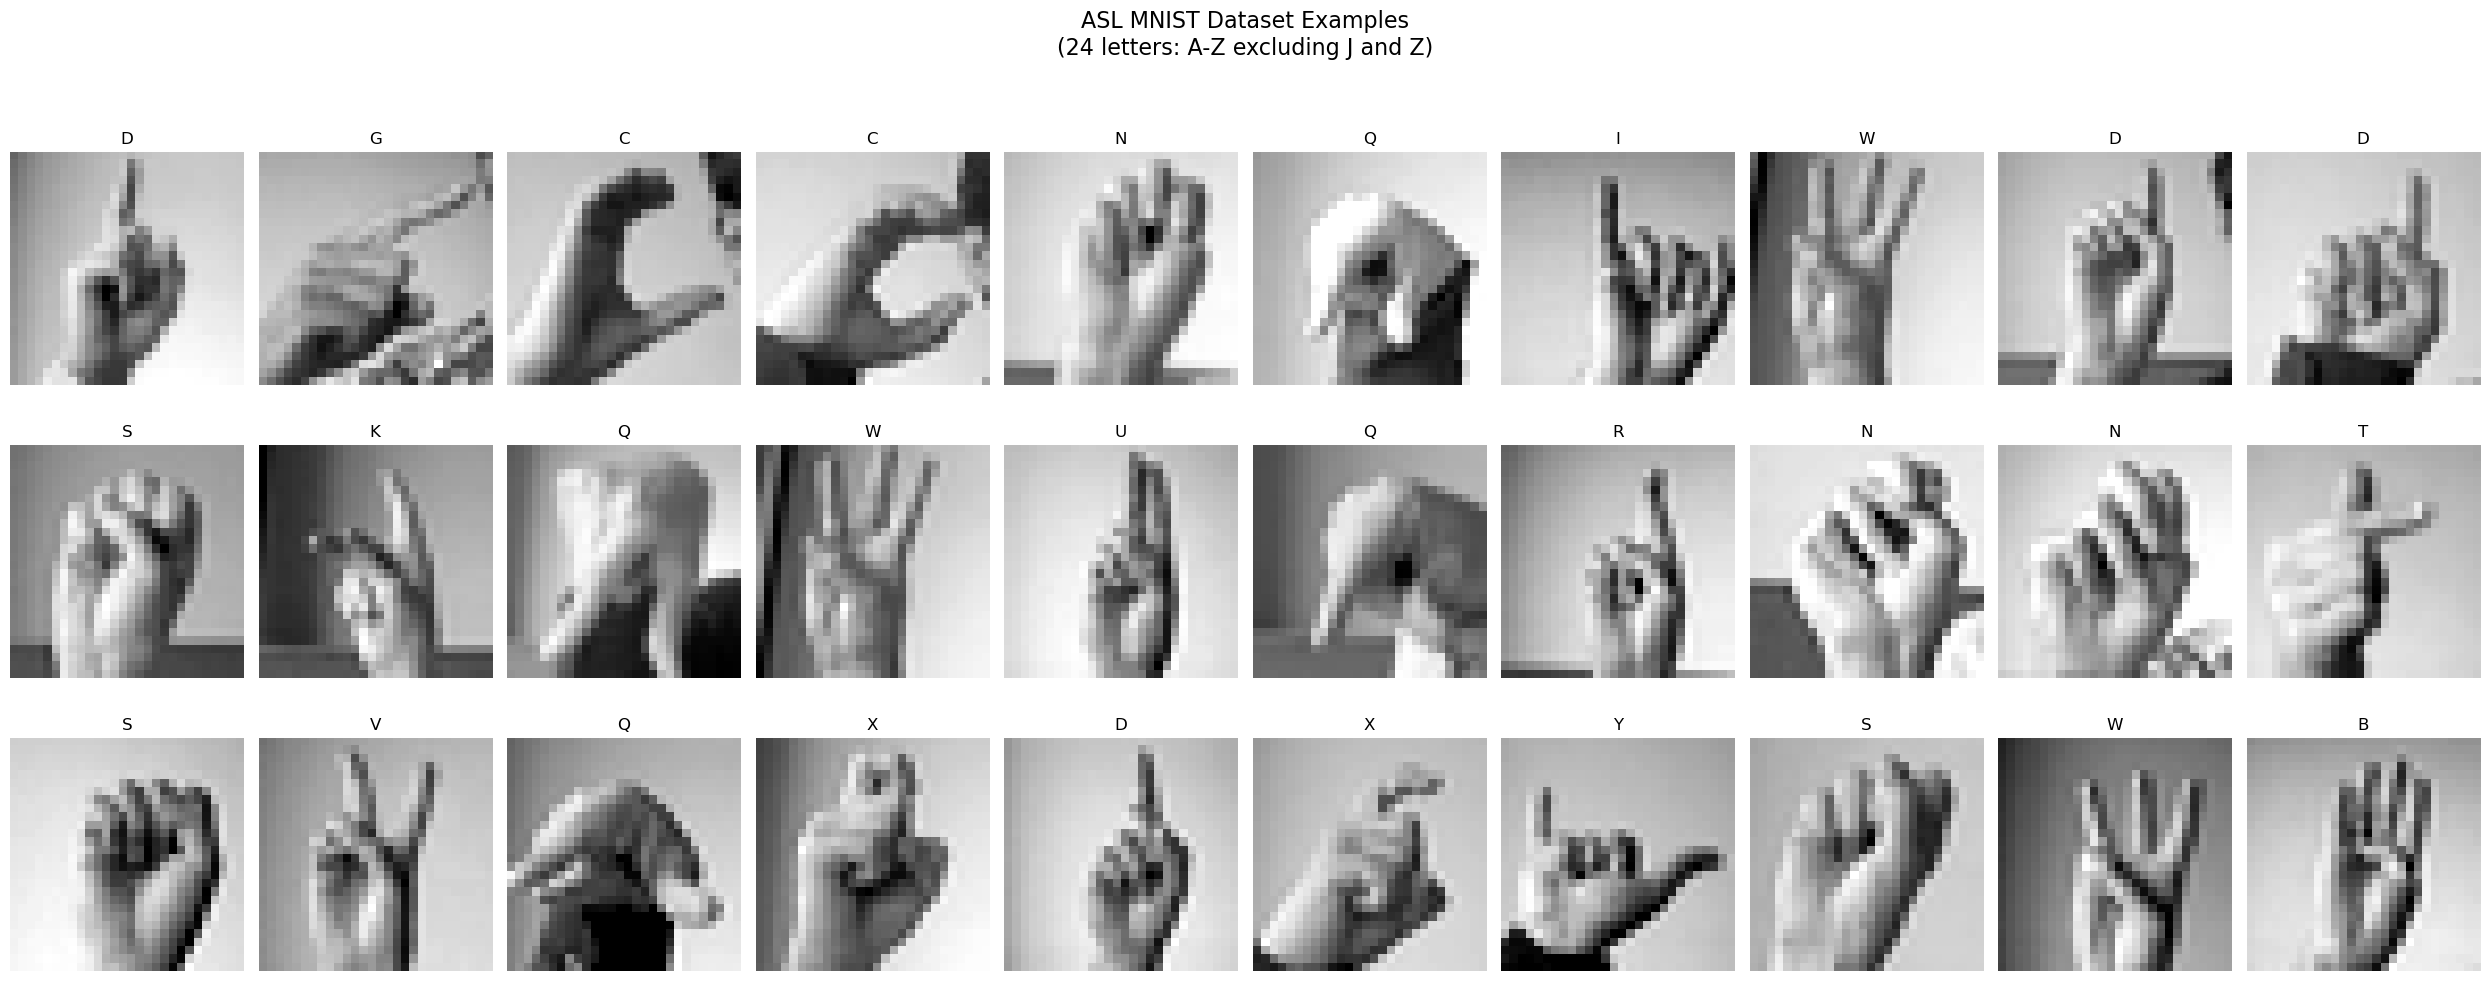

In [3]:
# plot some images
plt.figure(figsize=(25, 10))
plt.suptitle('ASL MNIST Dataset Examples\n(24 letters: A-Z excluding J and Z)', fontsize=16, y=1.02)

for i in range(30):
    plt.subplot(3, 10, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    label = chr(y_train[i] + 65)
    plt.title(f'{label}', fontsize=12)
    plt.axis('off')
plt.tight_layout()
plt.show()


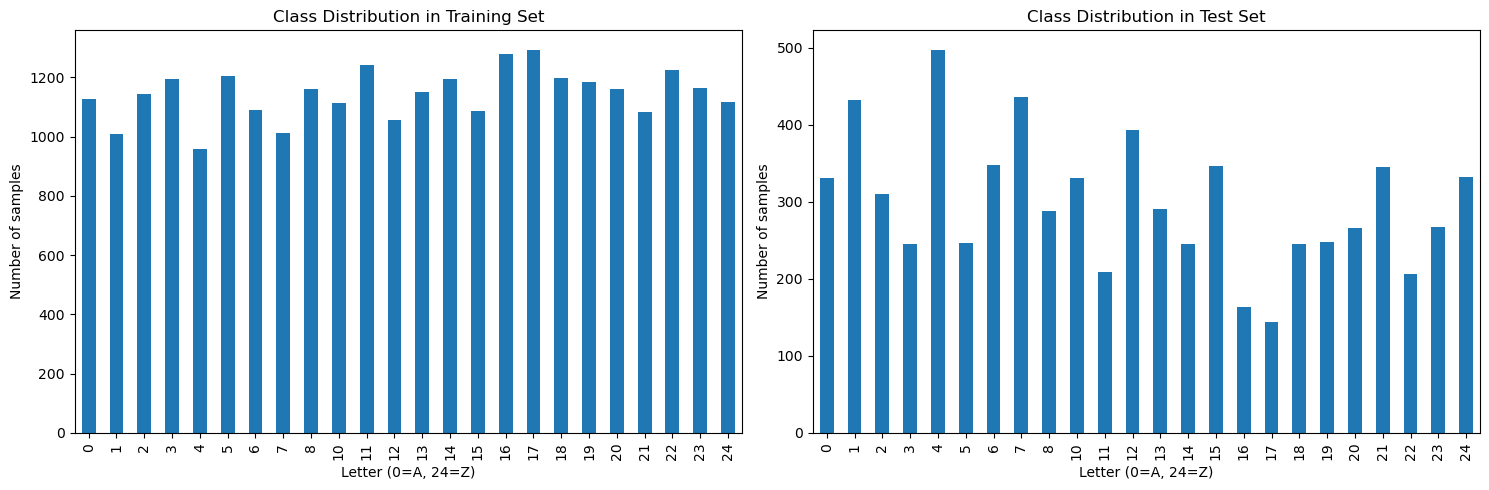

In [4]:
# Show class distribution
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
pd.Series(y_train).value_counts().sort_index().plot(kind='bar')
plt.title('Class Distribution in Training Set')
plt.xlabel('Letter (0=A, 24=Z)')
plt.ylabel('Number of samples')

plt.subplot(1, 2, 2)
pd.Series(y_test).value_counts().sort_index().plot(kind='bar')
plt.title('Class Distribution in Test Set')
plt.xlabel('Letter (0=A, 24=Z)')
plt.ylabel('Number of samples')
plt.tight_layout()
plt.show()

In [ ]:

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def sigmoidGradient(z):
    s = sigmoid(z)
    return s * (1 - s)

In [6]:
def costFunctionReg(X, y, theta, Lambda):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    error = (-y * np.log(h)) - ((1-y)*np.log(1-h))
    cost = sum(error)/m
    regCost = cost + Lambda/(2*m) * sum(theta[1:]**2)

    # Fix: Calculate gradients with proper dimensions
    gradients = (1/m) * np.dot(X.transpose(), (h - y))
    gradients[1:] = gradients[1:] + (Lambda/m) * theta[1:]

    return regCost, gradients

In [7]:
# Test costFunctionReg implementation with generated data
print("Testing costFunctionReg implementation...")

# Initialize test parameters
theta_t = np.array([-2, -1, 1, 2])  # Test theta values
# Create test design matrix X_t with ones in first column
X_t = np.column_stack((np.ones(5),    # Add intercept term
                      np.arange(1, 16).reshape(3, 5).T/10))  # Feature values divided by 10
y_t = np.array([1, 0, 1, 0, 1])  # Test labels
Lambda_t = 3  # Test regularization parameter

# Test the function
J, grad = costFunctionReg(X_t, y_t, theta_t, Lambda_t)

print("\nTest Results:")
print("-" * 50)
print(f"Cost: {J:.6f}")
print("\nGradients:")
print("-" * 50)
for i, g in enumerate(grad):
    print(f"grad[{i}] = {g:.6f}")

Testing costFunctionReg implementation...

Test Results:
--------------------------------------------------
Cost: 2.534819

Gradients:
--------------------------------------------------
grad[0] = 0.146561
grad[1] = -0.548558
grad[2] = 0.724722
grad[3] = 1.398003


In [8]:
def gradientDescent(X, y, theta, alpha, num_iters, Lambda):
    J_history = []

    for i in range(num_iters):
        cost, grad = costFunctionReg(X, y, theta, Lambda)
        theta = theta - (alpha * grad)
        J_history.append(cost)

    return theta, J_history

In [9]:
def oneVsAll(X, y, initial_theta, alpha, num_iters, Lambda, K):
    all_theta = []
    all_J = []

    m = X.shape[0]
    n = X.shape[1]

    X = np.append(np.ones((m,1)), X, axis=1)

    for i in range(K):
        print(f"Training classifier {i+1}/{K}")
        binary_y = np.where(y==i, 1, 0)
        theta, J_history = gradientDescent(X, binary_y, initial_theta, alpha, num_iters, Lambda)
        all_theta.extend(theta)
        all_J.extend(J_history)

    return np.array(all_theta).reshape(K, n+1), all_J


def predictOneVsAll(all_theta, X):
    m = X.shape[0]
    X = np.append(np.ones((m,1)), X, axis=1)
    predictions = np.dot(X, all_theta.T)
    return np.argmax(predictions, axis=1)

In [13]:
# Initialize parameters
print("\nTraining one-vs-all logistic regression...")
initial_theta = np.zeros(X_train.shape[1] + 1)
num_labels = len(np.unique(y_train))  # Should be 24 classes

# Train classifiers
all_theta, all_J = oneVsAll(X_train, y_train, initial_theta,
                           alpha=0.1, num_iters=300, Lambda=0.03,
                           K=num_labels)

# Make predictions
print("\nMaking predictions...")
train_pred = predictOneVsAll(all_theta, X_train)
test_pred = predictOneVsAll(all_theta, X_test)

# Calculate accuracies
train_accuracy = np.mean(train_pred == y_train) * 100
test_accuracy = np.mean(test_pred == y_test) * 100

print(f"\nResults:")
print(f"Training Set Accuracy: {train_accuracy:.2f}%")
print(f"Test Set Accuracy: {test_accuracy:.2f}%")


Training one-vs-all logistic regression...
Training classifier 1/24
Training classifier 2/24
Training classifier 3/24
Training classifier 4/24
Training classifier 5/24
Training classifier 6/24
Training classifier 7/24
Training classifier 8/24
Training classifier 9/24
Training classifier 10/24
Training classifier 11/24
Training classifier 12/24
Training classifier 13/24
Training classifier 14/24
Training classifier 15/24
Training classifier 16/24
Training classifier 17/24
Training classifier 18/24
Training classifier 19/24
Training classifier 20/24
Training classifier 21/24
Training classifier 22/24
Training classifier 23/24
Training classifier 24/24

Making predictions...

Results:
Training Set Accuracy: 62.48%
Test Set Accuracy: 53.23%


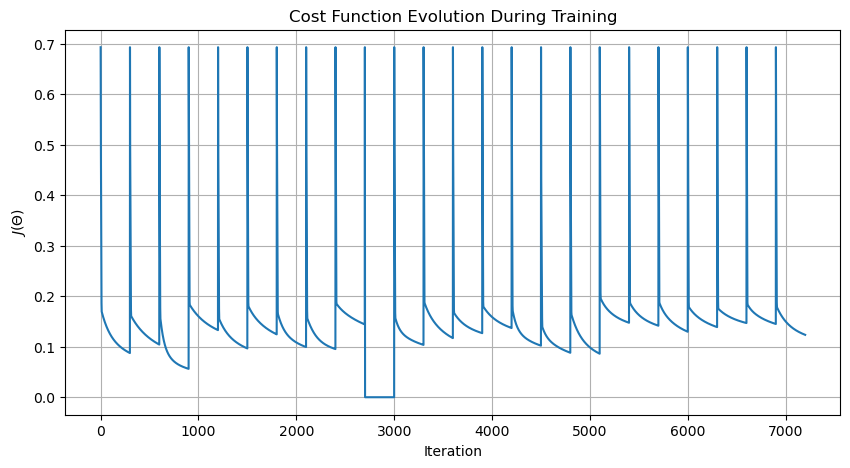

In [14]:
# Plot cost function
plt.figure(figsize=(10, 5))
plt.plot(all_J)
plt.xlabel("Iteration")
plt.ylabel("$J(\\Theta)$")
plt.title("Cost Function Evolution During Training")
plt.grid(True)
plt.show()

Training classifier 1/24
Training classifier 2/24
Training classifier 3/24
Training classifier 4/24
Training classifier 5/24
Training classifier 6/24
Training classifier 7/24
Training classifier 8/24
Training classifier 9/24
Training classifier 10/24
Training classifier 11/24
Training classifier 12/24
Training classifier 13/24
Training classifier 14/24
Training classifier 15/24
Training classifier 16/24
Training classifier 17/24
Training classifier 18/24
Training classifier 19/24
Training classifier 20/24
Training classifier 21/24
Training classifier 22/24
Training classifier 23/24
Training classifier 24/24
Lambda=0.000: Train Acc=37.61%, Test Acc=31.85%
Training classifier 1/24
Training classifier 2/24
Training classifier 3/24
Training classifier 4/24
Training classifier 5/24
Training classifier 6/24
Training classifier 7/24
Training classifier 8/24
Training classifier 9/24
Training classifier 10/24
Training classifier 11/24
Training classifier 12/24
Training classifier 13/24
Training

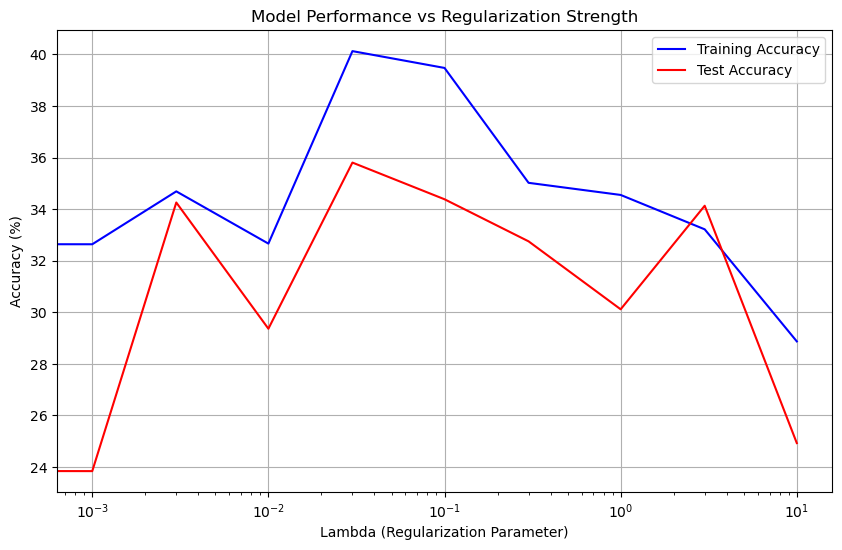


Best Lambda: 0.03
Best Test Accuracy: 35.81%
Training classifier 1/24
Training classifier 2/24
Training classifier 3/24
Training classifier 4/24
Training classifier 5/24
Training classifier 6/24
Training classifier 7/24
Training classifier 8/24
Training classifier 9/24
Training classifier 10/24
Training classifier 11/24
Training classifier 12/24
Training classifier 13/24
Training classifier 14/24
Training classifier 15/24
Training classifier 16/24
Training classifier 17/24
Training classifier 18/24
Training classifier 19/24
Training classifier 20/24
Training classifier 21/24
Training classifier 22/24
Training classifier 23/24
Training classifier 24/24
Alpha=0.010: Train Acc=40.39%, Test Acc=33.60%
Training classifier 1/24
Training classifier 2/24
Training classifier 3/24
Training classifier 4/24
Training classifier 5/24
Training classifier 6/24
Training classifier 7/24
Training classifier 8/24
Training classifier 9/24
Training classifier 10/24
Training classifier 11/24
Training classi

/var/folders/l3/g6s579ys4tj4mcr5rh4x02nc0000gn/T/ipykernel_83403/3993926405.py:4: RuntimeWarning: divide by zero encountered in log
  error = (-y * np.log(h)) - ((1-y)*np.log(1-h))
/var/folders/l3/g6s579ys4tj4mcr5rh4x02nc0000gn/T/ipykernel_83403/3993926405.py:4: RuntimeWarning: invalid value encountered in multiply
  error = (-y * np.log(h)) - ((1-y)*np.log(1-h))
/var/folders/l3/g6s579ys4tj4mcr5rh4x02nc0000gn/T/ipykernel_83403/3177782457.py:2: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


Training classifier 2/24
Training classifier 3/24
Training classifier 4/24
Training classifier 5/24
Training classifier 6/24
Training classifier 7/24
Training classifier 8/24
Training classifier 9/24
Training classifier 10/24
Training classifier 11/24
Training classifier 12/24
Training classifier 13/24
Training classifier 14/24
Training classifier 15/24
Training classifier 16/24
Training classifier 17/24
Training classifier 18/24
Training classifier 19/24
Training classifier 20/24
Training classifier 21/24
Training classifier 22/24
Training classifier 23/24
Training classifier 24/24
Alpha=3.000: Train Acc=29.66%, Test Acc=28.67%


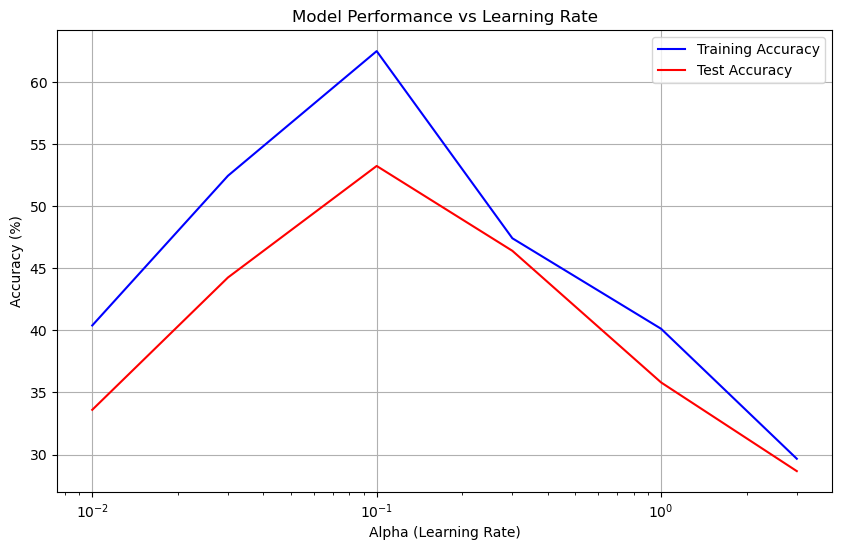


Best Alpha: 0.1
Best Test Accuracy: 53.23%


In [12]:
import numpy as np
import matplotlib.pyplot as plt

def trainModelWithParams(X_train, y_train, alpha, Lambda, num_iters=300, K=24):
    initial_theta = np.zeros(X_train.shape[1] + 1)
    all_theta, all_J = oneVsAll(X_train, y_train, initial_theta,
                               alpha=alpha, num_iters=num_iters,
                               Lambda=Lambda, K=K)
    return all_theta, all_J

# Test different lambda values
lambda_values = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
train_accuracies = []
test_accuracies = []

for Lambda in lambda_values:
    # Train model
    all_theta, all_J = trainModelWithParams(X_train, y_train, alpha=1, Lambda=Lambda)

    # Make predictions
    train_pred = predictOneVsAll(all_theta, X_train)
    test_pred = predictOneVsAll(all_theta, X_test)

    # Calculate accuracies
    train_acc = np.mean(train_pred == y_train) * 100
    test_acc = np.mean(test_pred == y_test) * 100

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Lambda={Lambda:.3f}: Train Acc={train_acc:.2f}%, Test Acc={test_acc:.2f}%")

# Plot results
plt.figure(figsize=(10, 6))
plt.semilogx(lambda_values, train_accuracies, 'b-', label='Training Accuracy')
plt.semilogx(lambda_values, test_accuracies, 'r-', label='Test Accuracy')
plt.xlabel('Lambda (Regularization Parameter)')
plt.ylabel('Accuracy (%)')
plt.title('Model Performance vs Regularization Strength')
plt.grid(True)
plt.legend()
plt.show()

# Find best lambda
best_lambda_idx = np.argmax(test_accuracies)
best_lambda = lambda_values[best_lambda_idx]
print(f"\nBest Lambda: {best_lambda}")
print(f"Best Test Accuracy: {test_accuracies[best_lambda_idx]:.2f}%")

# Now test different learning rates with best lambda
alpha_values = [0.01, 0.03, 0.1, 0.3, 1, 3]
train_accuracies = []
test_accuracies = []

for alpha in alpha_values:
    # Train model
    all_theta, all_J = trainModelWithParams(X_train, y_train, alpha=alpha, Lambda=best_lambda)

    # Make predictions
    train_pred = predictOneVsAll(all_theta, X_train)
    test_pred = predictOneVsAll(all_theta, X_test)

    # Calculate accuracies
    train_acc = np.mean(train_pred == y_train) * 100
    test_acc = np.mean(test_pred == y_test) * 100

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Alpha={alpha:.3f}: Train Acc={train_acc:.2f}%, Test Acc={test_acc:.2f}%")

# Plot results
plt.figure(figsize=(10, 6))
plt.semilogx(alpha_values, train_accuracies, 'b-', label='Training Accuracy')
plt.semilogx(alpha_values, test_accuracies, 'r-', label='Test Accuracy')
plt.xlabel('Alpha (Learning Rate)')
plt.ylabel('Accuracy (%)')
plt.title('Model Performance vs Learning Rate')
plt.grid(True)
plt.legend()
plt.show()

# Find best alpha
best_alpha_idx = np.argmax(test_accuracies)
best_alpha = alpha_values[best_alpha_idx]
print(f"\nBest Alpha: {best_alpha}")
print(f"Best Test Accuracy: {test_accuracies[best_alpha_idx]:.2f}%")


In [17]:
# describe X_train and y_train
print(X_train.shape)
print(y_train.shape)

(27455, 784)
(27455,)


In [25]:
def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, Lambda):
    Theta1 = nn_params[:((input_layer_size+1) * hidden_layer_size)].reshape(hidden_layer_size, input_layer_size+1)
    Theta2 = nn_params[((input_layer_size+1) * hidden_layer_size):].reshape(num_labels, hidden_layer_size+1)
    m = X.shape[0]

    # Forward propagation
    X_bias = np.append(np.ones((m,1)), X, axis=1)
    z2 = np.dot(X_bias, Theta1.T)
    a2 = sigmoid(z2)
    a2_bias = np.append(np.ones((m,1)), a2, axis=1)
    z3 = np.dot(a2_bias, Theta2.T)
    a3 = sigmoid(z3)

    # Convert y to matrix if it's not already
    if len(y.shape) == 1:
        y = y.reshape(-1, 1)

    # Convert y to one-hot encoding
    y_onehot = np.zeros((m, num_labels))
    for i in range(1, num_labels+1):
        y_onehot[:,i-1] = (y == i).reshape(-1)

    # Rest of the function remains the same
    epsilon = 1e-15
    cost = -1/m * np.sum(y_onehot * np.log(a3 + epsilon) + (1 - y_onehot) * np.log(1 - a3 + epsilon))
    reg_term = Lambda/(2*m) * (np.sum(Theta1[:,1:]**2) + np.sum(Theta2[:,1:]**2))
    J = cost + reg_term

    delta3 = a3 - y_onehot
    delta2 = np.dot(delta3, Theta2) * np.append(np.ones((m,1)), sigmoidGradient(z2), axis=1)
    delta2 = delta2[:,1:]

    Theta1_grad = 1/m * np.dot(delta2.T, X_bias)
    Theta2_grad = 1/m * np.dot(delta3.T, a2_bias)

    Theta1_grad[:,1:] = Theta1_grad[:,1:] + (Lambda/m) * Theta1[:,1:]
    Theta2_grad[:,1:] = Theta2_grad[:,1:] + (Lambda/m) * Theta2[:,1:]

    return J, Theta1_grad, Theta2_grad

def trainNN(X, y, input_layer_size, hidden_layer_size, num_labels, Lambda=0.01, alpha=0.1,
            num_iters=200, batch_size=64):
    print("Initializing Neural Network...")

    # Initialize parameters using Xavier initialization
    epsilon_1 = np.sqrt(6) / np.sqrt(input_layer_size + hidden_layer_size)
    epsilon_2 = np.sqrt(6) / np.sqrt(hidden_layer_size + num_labels)

    Theta1 = np.random.uniform(-epsilon_1, epsilon_1, (hidden_layer_size, input_layer_size + 1))
    Theta2 = np.random.uniform(-epsilon_2, epsilon_2, (num_labels, hidden_layer_size + 1))

    # Initialize momentum
    v_Theta1 = np.zeros_like(Theta1)
    v_Theta2 = np.zeros_like(Theta2)
    beta = 0.9

    m = X.shape[0]
    J_history = []

    print("Training Neural Network...")
    for i in range(num_iters):
        # Mini-batch processing
        indices = np.random.permutation(m)
        for batch_start in range(0, m, batch_size):
            batch_end = min(batch_start + batch_size, m)
            X_batch = X[indices[batch_start:batch_end]]
            y_batch = y[indices[batch_start:batch_end]]

            # Forward and backward propagation
            nn_params = np.concatenate([Theta1.ravel(), Theta2.ravel()])
            cost, grad1, grad2 = nnCostFunction(nn_params, input_layer_size,
                                              hidden_layer_size, num_labels,
                                              X_batch, y_batch, Lambda)

            # Update with momentum
            v_Theta1 = beta * v_Theta1 + (1 - beta) * grad1
            v_Theta2 = beta * v_Theta2 + (1 - beta) * grad2

            Theta1 = Theta1 - alpha * v_Theta1
            Theta2 = Theta2 - alpha * v_Theta2

        # Compute cost for full dataset
        nn_params = np.concatenate([Theta1.ravel(), Theta2.ravel()])
        J, _, _ = nnCostFunction(nn_params, input_layer_size, hidden_layer_size,
                                num_labels, X, y, Lambda)
        J_history.append(J)

        if i % 10 == 0:
            print(f"Iteration {i}: Cost = {J}")

        # Learning rate decay
        if i > 0 and i % 50 == 0:
            alpha *= 0.95

    return Theta1, Theta2, J_history

# Training call
input_layer_size = X_train.shape[1]
hidden_layer_size = 256  # Increased hidden layer
num_labels = 24

Theta1, Theta2, J_history = trainNN(X_train, y_train + 1,  # Add 1 because labels start at 0
                                   input_layer_size=input_layer_size,
                                   hidden_layer_size=hidden_layer_size,
                                   num_labels=num_labels,
                                   Lambda=0.01,  # Reduced regularization
                                   alpha=0.1,    # Adjusted learning rate
                                   num_iters=200,
                                   batch_size=64)

Initializing Neural Network...
Training Neural Network...
Iteration 0: Cost = 3.5723224935440356
Iteration 10: Cost = 1.3560668418869684
Iteration 20: Cost = 0.8015988286261273
Iteration 30: Cost = 0.5273468582684218
Iteration 40: Cost = 0.3504399462975012
Iteration 50: Cost = 0.25826723566476817
Iteration 60: Cost = 0.2143753158055282
Iteration 70: Cost = 0.1821899975928283
Iteration 80: Cost = 0.16545583864548458
Iteration 90: Cost = 0.15908114346448937
Iteration 100: Cost = 0.1432820720889314
Iteration 110: Cost = 0.13594618975519843
Iteration 120: Cost = 0.13321964876108322
Iteration 130: Cost = 0.13190005599732813
Iteration 140: Cost = 0.12832554469868626
Iteration 150: Cost = 0.12256889756544041
Iteration 160: Cost = 0.1243741658307991
Iteration 170: Cost = 0.11956869321804134
Iteration 180: Cost = 0.11802992697499101
Iteration 190: Cost = 0.119492699586426


In [ ]:
# Calculate accuracies
def predictNN(Theta1, Theta2, X):
    m = X.shape[0]
    num_labels = Theta2.shape[0]

    X_bias = np.append(np.ones((m,1)), X, axis=1)
    z2 = np.dot(X_bias, Theta1.T)
    a2 = sigmoid(z2)
    a2_bias = np.append(np.ones((m,1)), a2, axis=1)
    z3 = np.dot(a2_bias, Theta2.T)
    a3 = sigmoid(z3)

    return np.argmax(a3, axis=1)

# Make predictions
train_pred = predictNN(Theta1, Theta2, X_train)
test_pred = predictNN(Theta1, Theta2, X_test)

# Calculate accuracies
train_accuracy = np.mean(train_pred == y_train) * 100
test_accuracy = np.mean(test_pred == y_test) * 100

print(f"\nResults:")
print(f"Training Set Accuracy: {train_accuracy:.2f}%")
print(f"Test Set Accuracy: {test_accuracy:.2f}%")

IndentationError: expected an indented block after function definition on line 2 (1370959123.py, line 3)